<h1>Network of Reddit Users with Negative Sentiments (Corona Lockdown)</h1>

Objective: 
- To find out which author on Reddit is the most negative based its interaction with other authors (determined by the edge weight/frequency) in the coronavirus anti lockdown subreddit and possibly showcase some comments which have been posted by that author of interest

Findings:
- Most negative author: Johari82

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
reddit_sentiments = pd.read_csv('../Reddit_Sentiments/corona_sentiments.csv')

In [3]:
reddit_sentiments

,Unnamed: 0,Unnamed: 0.1,id,author,title,score,comms_num,created,timestamp,commenter,comment,top_lvl,sentiment_polarity
0,0,0,g1hpwu,Johari82,Ending coronavirus lockdowns will be a dangero...,6967,1484,1.586912e+09,2020-04-15 08:46:34,Skooter_McGaven,I wish we had an understanding of where the ma...,1,positive
1,1,0,g1hpwu,Johari82,Ending coronavirus lockdowns will be a dangero...,6967,1484,1.586912e+09,2020-04-15 08:46:34,Richandler,> Is it overly family spread?\n\nI believe the...,0,neutral
2,2,0,g1hpwu,Johari82,Ending coronavirus lockdowns will be a dangero...,6967,1484,1.586912e+09,2020-04-15 08:46:34,NaN,This sounds horrible and I hate myself a littl...,0,negative
3,3,0,g1hpwu,Johari82,Ending coronavirus lockdowns will be a dangero...,6967,1484,1.586912e+09,2020-04-15 08:46:34,lcbk,My husband and I are not yet confirmed to have...,0,negative
4,4,0,g1hpwu,Johari82,Ending coronavirus lockdowns will be a dangero...,6967,1484,1.586912e+09,2020-04-15 08:46:34,ZombiGrn,In my neighborhood people started throwing par...,0,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,642,0,uzdkg1,zeaqqk,"In the Midst of a Pandemic, Introverts May Hav...",589,39,1.653704e+09,2022-05-28 10:14:14,armageddon_20xx,What makes sense intuitively is not always sci...,0,positive
643,643,0,uzdkg1,zeaqqk,"In the Midst of a Pandemic, Introverts May Hav...",589,39,1.653704e+09,2022-05-28 10:14:14,pinganeto,"if you don't mesure it, it don't exist.\n\nall...",0,neutral
644,644,0,uzdkg1,zeaqqk,"In the Midst of a Pandemic, Introverts May Hav...",589,39,1.653704e+09,2022-05-28 10:14:14,Ariadnepyanfar,The first year of the pandemic first responder...,0,negative
645,645,0,uzdkg1,zeaqqk,"In the Midst of a Pandemic, Introverts May Hav...",589,39,1.653704e+09,2022-05-28 10:14:14,WitnessNo8046,Extroversion doesn’t inherently mean someone i...,0,neutral


In [4]:
# Create new DataFrame for forming a network graph

user_networks = reddit_sentiments.filter(['author','commenter','comment'], axis=1)
user_networks['type'] = ['Undirected'] * user_networks.shape[0]
user_networks['weight'] = [1] * user_networks.shape[0]
user_networks

,author,commenter,comment,type,weight
0,Johari82,Skooter_McGaven,I wish we had an understanding of where the ma...,Undirected,1
1,Johari82,Richandler,> Is it overly family spread?\n\nI believe the...,Undirected,1
2,Johari82,NaN,This sounds horrible and I hate myself a littl...,Undirected,1
3,Johari82,lcbk,My husband and I are not yet confirmed to have...,Undirected,1
4,Johari82,ZombiGrn,In my neighborhood people started throwing par...,Undirected,1
...,...,...,...,...,...
642,zeaqqk,armageddon_20xx,What makes sense intuitively is not always sci...,Undirected,1
643,zeaqqk,pinganeto,"if you don't mesure it, it don't exist.\n\nall...",Undirected,1
644,zeaqqk,Ariadnepyanfar,The first year of the pandemic first responder...,Undirected,1
645,zeaqqk,WitnessNo8046,Extroversion doesn’t inherently mean someone i...,Undirected,1


In [5]:
# Check for correctness

author = user_networks[user_networks['author'] == 'signed7']
author

,author,commenter,comment,type,weight


In [6]:
# Preview edge weight

edges = user_networks.groupby(['author','commenter']).agg({'weight':'sum'}).reset_index()
edges

,author,commenter,weight
0,GallantIce,AKADriver,1
1,GallantIce,Airlineguy1,1
2,GallantIce,BornUnderPunches,1
3,GallantIce,DNAhelicase,2
4,GallantIce,Every-End,1
...,...,...,...
364,zeaqqk,DURIAN8888,1
365,zeaqqk,WitnessNo8046,2
366,zeaqqk,armageddon_20xx,1
367,zeaqqk,pinganeto,1


In [7]:
# Sort DataFrame based on descending edge weight

edges.sort_values('weight', ascending=False).head()

,author,commenter,weight
70,Johari82,JenniferColeRhuk,16
302,p44v9n,NobodyKnowsYourName2,5
152,Johari82,jphamlore,5
254,john_wb,JenniferColeRhuk,5
329,p44v9n,p44v9n,5


In [8]:
# Create a network graph

network = nx.from_pandas_edgelist(edges, 
                            source='author',
                            target='commenter',
                            edge_attr='weight' )

In [9]:
# Get network graph nodes (author) and edges (interaction) info

print(nx.info(network))

Graph with 342 nodes and 369 edges


<ipython-input-9-06ea12accad0>:3: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(network))


In [10]:
# Get network graph degree per node

weighted_degrees = dict(nx.degree(network, weight='weight'))
# weighted_degrees
# print(sum(weighted_degrees.values()))
# print(len(weighted_degrees.values()))
avg_degree = sum(weighted_degrees.values()) / len(weighted_degrees.values())
avg_degree

2.7017543859649122

In [11]:
subGraph = network.subgraph([n for n in weighted_degrees if weighted_degrees[n] > 2.35])

In [12]:
# Focus on sub network with a considerable high degree centrality

print(nx.info(subGraph))

Graph with 22 nodes and 42 edges


<ipython-input-12-f52f3a138b15>:3: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(subGraph))


In [13]:
# Create subgraph's network 

pos = nx.spring_layout(network, weight='weight', iterations=20, k=4)

<ipython-input-14-c235fc96ccbe>:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


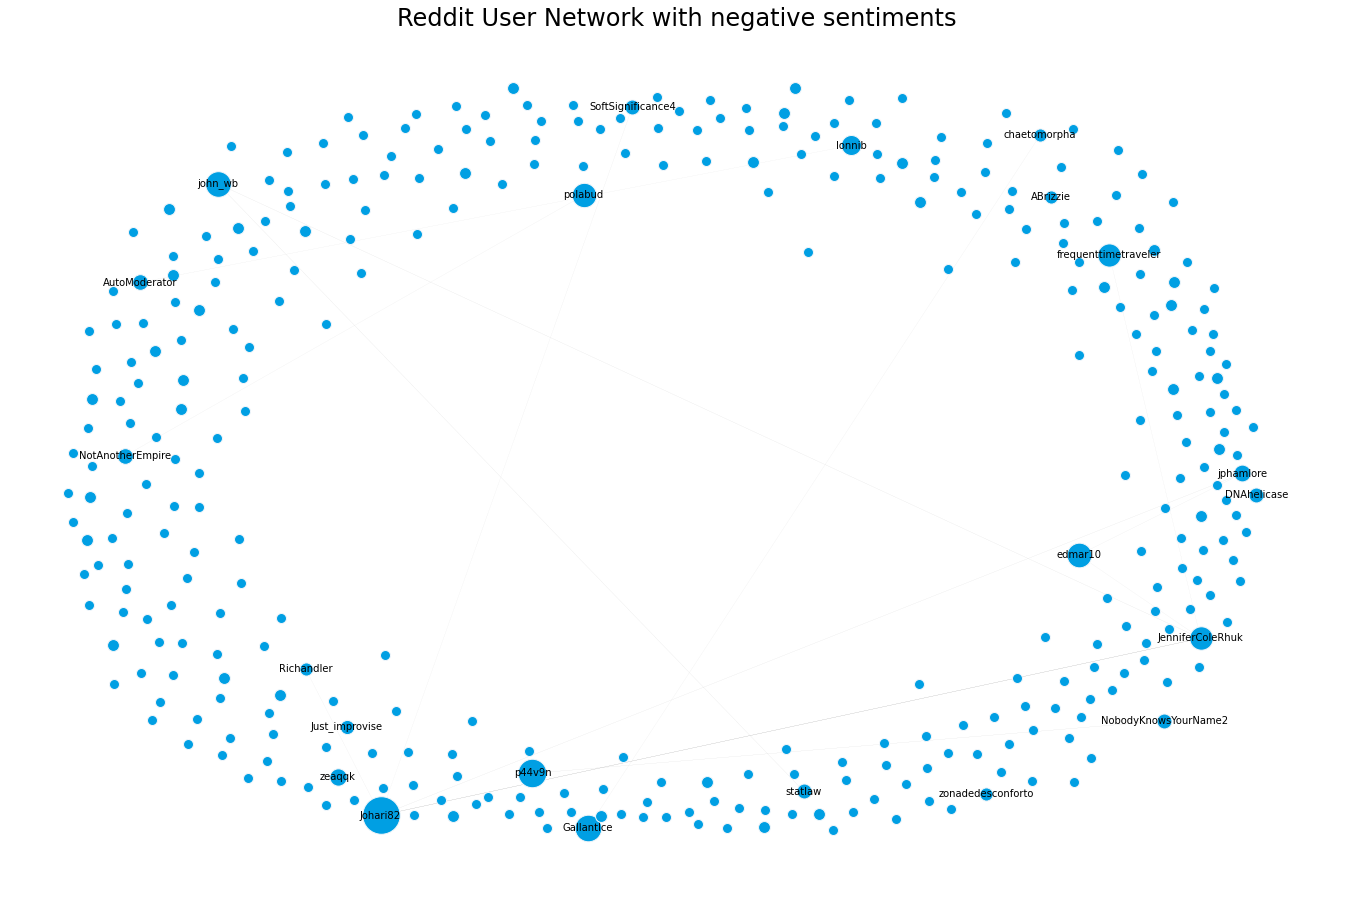

In [14]:
# Plot subgraph's network

fig, ax = plt.subplots()
figsize = fig.get_size_inches()
plt.axis('off')
plt.title('Reddit User Network with negative sentiments', fontsize = 24)


for node in network.nodes():
    size = 100*weighted_degrees[node]**0.5
    ns = nx.draw_networkx_nodes(network, pos, nodelist=[node], node_size=size, node_color='#009fe3')
    ns.set_edgecolor('#f2f6fa')

nx.draw_networkx_labels(network, pos, {n:n.replace('-','\n') for n in network.nodes() if weighted_degrees[n]>2.35},font_size=10);

for e in network.edges(data=True):
    if e[2]['weight']>2.35:
        nx.draw_networkx_edges(network, pos,[e], width=e[2]['weight']/100, edge_color='#707070')
        
fig.set_size_inches(figsize * 4)
fig.show()

In [15]:
# Most negative user and its comments

author = reddit_sentiments[(reddit_sentiments['author'] == 'Johari82') & (reddit_sentiments['sentiment_polarity'] == 'negative')]
author

,Unnamed: 0,Unnamed: 0.1,id,author,title,score,comms_num,created,timestamp,commenter,comment,top_lvl,sentiment_polarity
2,2,0,g1hpwu,Johari82,Ending coronavirus lockdowns will be a dangero...,6967,1484,1.586912e+09,2020-04-15 08:46:34,NaN,This sounds horrible and I hate myself a littl...,0,negative
3,3,0,g1hpwu,Johari82,Ending coronavirus lockdowns will be a dangero...,6967,1484,1.586912e+09,2020-04-15 08:46:34,lcbk,My husband and I are not yet confirmed to have...,0,negative
14,14,0,g1hpwu,Johari82,Ending coronavirus lockdowns will be a dangero...,6967,1484,1.586912e+09,2020-04-15 08:46:34,HeyThereMrBrooks,This sub is at least more realistic with the h...,0,negative
23,23,0,g1hpwu,Johari82,Ending coronavirus lockdowns will be a dangero...,6967,1484,1.586912e+09,2020-04-15 08:46:34,spookthesunset,Remember that this sub only focuses on the sci...,0,negative
34,34,0,g1hpwu,Johari82,Ending coronavirus lockdowns will be a dangero...,6967,1484,1.586912e+09,2020-04-15 08:46:34,PlayFree_Bird,This needs to be stressed: the only justificat...,1,negative
38,38,0,g1hpwu,Johari82,Ending coronavirus lockdowns will be a dangero...,6967,1484,1.586912e+09,2020-04-15 08:46:34,SoftSignificance4,"For whatever reason, this keeps being said but...",0,negative
41,41,0,g1hpwu,Johari82,Ending coronavirus lockdowns will be a dangero...,6967,1484,1.586912e+09,2020-04-15 08:46:34,jibbick,>Lockdowns can only be justified on the basis ...,0,negative
46,46,0,g1hpwu,Johari82,Ending coronavirus lockdowns will be a dangero...,6967,1484,1.586912e+09,2020-04-15 08:46:34,NaN,I’ve been trying to explain this comment to my...,0,negative
47,47,0,g1hpwu,Johari82,Ending coronavirus lockdowns will be a dangero...,6967,1484,1.586912e+09,2020-04-15 08:46:34,Mydst,I think the fear is the exponential nature of ...,0,negative
51,51,0,g1hpwu,Johari82,Ending coronavirus lockdowns will be a dangero...,6967,1484,1.586912e+09,2020-04-15 08:46:34,classicrando,> Lockdowns can only be justified on the basis...,0,negative


In [16]:
# Node-level Statistics
# Normalize - Better for comparison between different networks

print("Number of nodes in subGraph: ", subGraph.number_of_nodes())
print("==========================================")
print("Number of edges in subGraph: ", subGraph.number_of_edges())
print("==========================================")
print("Nodes' Degree Centrality (Non-Normalized) in subGraph: ", nx.degree(subGraph))
print("==========================================")
print("Nodes' Degree Centrality (Normalized) in subGraph: ", nx.degree_centrality(subGraph))

Number of nodes in subGraph:  22
Number of edges in subGraph:  42
Nodes' Degree Centrality (Non-Normalized) in subGraph:  [('DNAhelicase', 3), ('JenniferColeRhuk', 6), ('lonnib', 3), ('NobodyKnowsYourName2', 1), ('ABrizzie', 2), ('GallantIce', 6), ('Johari82', 8), ('Just_improvise', 3), ('frequenttimetraveler', 7), ('edmar10', 7), ('chaetomorpha', 1), ('zeaqqk', 3), ('NotAnotherEmpire', 4), ('john_wb', 6), ('polabud', 7), ('Richandler', 1), ('zonadedesconforto', 3), ('jphamlore', 2), ('p44v9n', 4), ('SoftSignificance4', 2), ('statlaw', 1), ('AutoModerator', 4)]
Nodes' Degree Centrality (Normalized) in subGraph:  {'DNAhelicase': 0.14285714285714285, 'JenniferColeRhuk': 0.2857142857142857, 'lonnib': 0.14285714285714285, 'NobodyKnowsYourName2': 0.047619047619047616, 'ABrizzie': 0.09523809523809523, 'GallantIce': 0.2857142857142857, 'Johari82': 0.38095238095238093, 'Just_improvise': 0.14285714285714285, 'frequenttimetraveler': 0.3333333333333333, 'edmar10': 0.3333333333333333, 'chaetomorph

In [17]:
# Node-level Statistics

print("Nodes' Closeness Centrality in subGraph: ", nx.closeness_centrality(subGraph))
print("==========================================")
print("Nodes' Eigenvector Centrality in subGraph: ", nx.eigenvector_centrality(subGraph))
print("==========================================")
print("Nodes' Betweenness Centrality (Normalized) in subGraph: ", nx.betweenness_centrality(subGraph, normalized=True))

Nodes' Closeness Centrality in subGraph:  {'DNAhelicase': 0.39622641509433965, 'JenniferColeRhuk': 0.5121951219512195, 'lonnib': 0.3, 'NobodyKnowsYourName2': 0.26582278481012656, 'ABrizzie': 0.38181818181818183, 'GallantIce': 0.38181818181818183, 'Johari82': 0.525, 'Just_improvise': 0.42857142857142855, 'frequenttimetraveler': 0.5121951219512195, 'edmar10': 0.4772727272727273, 'chaetomorpha': 0.28, 'zeaqqk': 0.3, 'NotAnotherEmpire': 0.4666666666666667, 'john_wb': 0.5121951219512195, 'polabud': 0.42857142857142855, 'Richandler': 0.35, 'zonadedesconforto': 0.4117647058823529, 'jphamlore': 0.3888888888888889, 'p44v9n': 0.3559322033898305, 'SoftSignificance4': 0.42, 'statlaw': 0.3442622950819672, 'AutoModerator': 0.42}
Nodes' Eigenvector Centrality in subGraph:  {'DNAhelicase': 0.17316549135020431, 'JenniferColeRhuk': 0.3759016146867047, 'lonnib': 0.043402389144558386, 'NobodyKnowsYourName2': 0.023468856603940352, 'ABrizzie': 0.14173670938530938, 'GallantIce': 0.17279667723679037, 'Johari8

In [18]:
# Network-level Statistics

print("Network Density in subGraph: ", nx.density(subGraph))
print("==========================================")
print("Network Diameter in subGraph: ", nx.diameter(subGraph))
print("==========================================")
print("Network Average path length in subGraph: ", nx.average_shortest_path_length(subGraph))

Network Density in subGraph:  0.18181818181818182
Network Diameter in subGraph:  6
Network Average path length in subGraph:  2.58008658008658


In [19]:
# Network-level Statistics

num_max_reachable_other_nodes = subGraph.number_of_nodes() - 1

print("Total number of reachable other nodes: ", num_max_reachable_other_nodes)
node_list = list(subGraph.nodes)  # All nodes - we will iterate through this list, one node at a time

node_reachability_list = []
for node in node_list:
    # Retrieve 'descendants' or all reachable other nodes
    # nx.descendants returns a Set
    desc = nx.descendants(subGraph, node)
    
    # How many other nodes are reachable from this node?
    num_reachable_from_this_node = len(desc)
    node_reachability = num_reachable_from_this_node / num_max_reachable_other_nodes
    print("==========================================")
    print("Current node is", node, " and node-level reachability is", node_reachability)
    print(desc)
    node_reachability_list.append(node_reachability)
    
print("\n################ Network-level Reachability ################")
print( sum(node_reachability_list) / len(node_reachability_list) )

Total number of reachable other nodes:  21
Current node is DNAhelicase  and node-level reachability is 1.0
{'JenniferColeRhuk', 'lonnib', 'NobodyKnowsYourName2', 'ABrizzie', 'GallantIce', 'Johari82', 'Just_improvise', 'edmar10', 'frequenttimetraveler', 'chaetomorpha', 'zeaqqk', 'NotAnotherEmpire', 'john_wb', 'polabud', 'Richandler', 'zonadedesconforto', 'jphamlore', 'p44v9n', 'SoftSignificance4', 'statlaw', 'AutoModerator'}
Current node is JenniferColeRhuk  and node-level reachability is 1.0
{'DNAhelicase', 'lonnib', 'NobodyKnowsYourName2', 'ABrizzie', 'GallantIce', 'Johari82', 'Just_improvise', 'edmar10', 'frequenttimetraveler', 'chaetomorpha', 'zeaqqk', 'NotAnotherEmpire', 'john_wb', 'polabud', 'Richandler', 'jphamlore', 'zonadedesconforto', 'p44v9n', 'SoftSignificance4', 'statlaw', 'AutoModerator'}
Current node is lonnib  and node-level reachability is 1.0
{'DNAhelicase', 'JenniferColeRhuk', 'NobodyKnowsYourName2', 'ABrizzie', 'GallantIce', 'Johari82', 'Just_improvise', 'frequenttim